In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Cópia de kc_house_data_with_social_classes.csv') # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [5]:
data.head() # mostra o cabeçalho presentes nas amostras do conjunto de treinamento

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Social Class
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,lower
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,lower middle
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,lower
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,lower middle
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,lower middle


In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'Social Class'],
      dtype='object')

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  int64  
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21611 non-null  float64
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [8]:
data.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

In [9]:
# como NaN sempre nos causa problemas, (1) retiramos esse atributo ou (2) preenchemos com valores médios
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [10]:
print(data.values[10])
print(data.values[17])

[10 1736800520 '20150403T000000' 662500.0 3 2.5 3560 9796 1.0 0 0 3 8 nan
 1700 1965 0 98007 47.6007 -122.145 2210 8925 'upper middle']
[17 6865200140 '20140529T000000' 485000.0 4 1.0 1600 4300 1.5 0 0 4 7 nan
 0 1916 0 98103 47.6648 -122.343 1610 4300 'lower middle']


In [11]:
data = data.drop([10, 17])

In [12]:
data.isnull().sum() # dados faltantes ou NaN

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Social Class     0
dtype: int64

In [13]:
data.values[10]

array([11, 9212900260, '20140527T000000', 468000.0, 2, 1.0, 1160, 6000,
       1.0, 0, 0, 4, 7, 860.0, 300, 1942, 0, 98115, 47.69, -122.292, 1330,
       6000, 'lower middle'], dtype=object)

In [14]:
data = data.drop(['id','price', 'date', 'sqft_above', 'sqft_basement', 'view', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
data.head()

,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,3,1.00,1180,5650,1.0,0,3,7,1955,lower
1,1,3,2.25,2570,7242,2.0,0,3,7,1951,lower middle
2,2,2,1.00,770,10000,1.0,0,3,6,1933,lower
3,3,4,3.00,1960,5000,1.0,0,5,7,1965,lower middle
4,4,3,2.00,1680,8080,1.0,0,3,8,1987,lower middle


lower class < 234000 -> 8% of the population

234000 <= working class < 399500 -> 32% of the population

399500 <= lower middle class < 612000 -> 32% of the population

612000 <= upper middle class < 799000 -> 14% of the population

765000 <= upper class <= 1960000 -> 13% of the population

1960000 < toppest class 1% of the population

[3 3 2 ... 2 3 2]


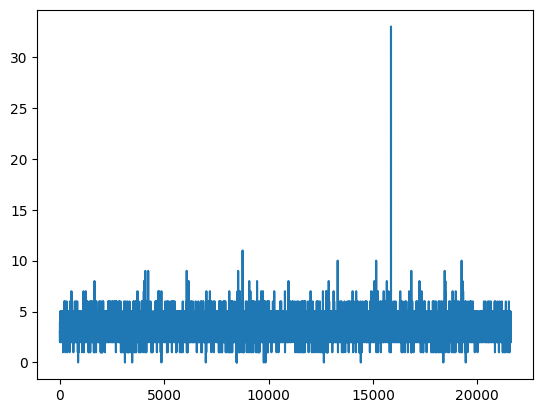

In [15]:
import matplotlib.pyplot as plt

data_bedrooms = data.values[:,1]
print(data_bedrooms)
plt.plot(data_bedrooms)


In [16]:


q1_bedrooms = 2
q2_bedrooms = 5
q3_bedrooms = 9

size = len(data_bedrooms)
for i in range(size):
  if (data_bedrooms[i]<= q1_bedrooms):
      data['bedrooms'] = data['bedrooms'].replace(data_bedrooms[i], 'low_bed')
  elif(q1_bedrooms < data_bedrooms[i] <= q2_bedrooms):
      data['bedrooms'] = data['bedrooms'].replace(data_bedrooms[i], 'middle_bed')
  elif(q2_bedrooms < data_bedrooms[i] <= q3_bedrooms):
      data['bedrooms'] = data['bedrooms'].replace(data_bedrooms[i], 'high_bed')
  elif(data_bedrooms[i]> q3_bedrooms):
      data['bedrooms'] = data['bedrooms'].replace(data_bedrooms[i], 'top_bed')


In [17]:
print(data['bedrooms'])
data.head()

0        middle_bed
1        middle_bed
2           low_bed
3        middle_bed
4        middle_bed
            ...    
21608    middle_bed
21609    middle_bed
21610       low_bed
21611    middle_bed
21612       low_bed
Name: bedrooms, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,1.00,1180,5650,1.0,0,3,7,1955,lower
1,1,middle_bed,2.25,2570,7242,2.0,0,3,7,1951,lower middle
2,2,low_bed,1.00,770,10000,1.0,0,3,6,1933,lower
3,3,middle_bed,3.00,1960,5000,1.0,0,5,7,1965,lower middle
4,4,middle_bed,2.00,1680,8080,1.0,0,3,8,1987,lower middle


[1.0 2.25 1.0 ... 0.75 2.5 0.75]


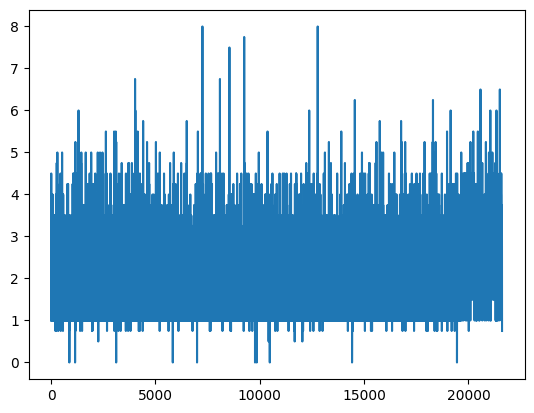

In [18]:
data_bathrooms = data.values[:,2]
print(data_bathrooms)
plt.plot(data_bathrooms)

In [19]:
q1_bathrooms = 2
q2_bathrooms = 4
q3_bathrooms = 6

size = len(data_bathrooms)
for i in range(size):
  if (data_bathrooms[i]<= q1_bathrooms):
      data['bathrooms'] = data['bathrooms'].replace(data_bathrooms[i], 'low_bath')
  elif(q1_bathrooms < data_bathrooms[i] <= q2_bathrooms):
      data['bathrooms'] = data['bathrooms'].replace(data_bathrooms[i], 'middle_bath')
  elif(q2_bathrooms < data_bathrooms[i] <= q3_bathrooms):
      data['bathrooms'] = data['bathrooms'].replace(data_bathrooms[i], 'high_bath')
  elif(data_bathrooms[i]> q3_bathrooms):
      data['bathrooms'] = data['bathrooms'].replace(data_bathrooms[i], 'top_bath')


In [20]:
print(data['bathrooms'])
data.head()

0           low_bath
1        middle_bath
2           low_bath
3        middle_bath
4           low_bath
            ...     
21608    middle_bath
21609    middle_bath
21610       low_bath
21611    middle_bath
21612       low_bath
Name: bathrooms, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,1180,5650,1.0,0,3,7,1955,lower
1,1,middle_bed,middle_bath,2570,7242,2.0,0,3,7,1951,lower middle
2,2,low_bed,low_bath,770,10000,1.0,0,3,6,1933,lower
3,3,middle_bed,middle_bath,1960,5000,1.0,0,5,7,1965,lower middle
4,4,middle_bed,low_bath,1680,8080,1.0,0,3,8,1987,lower middle


[1180 2570 770 ... 1020 1600 1020]


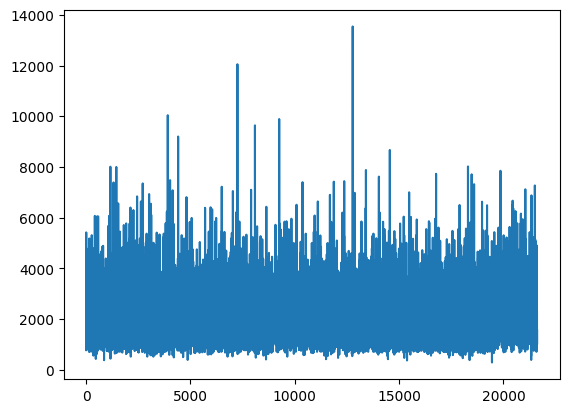

In [21]:
data_sqft_living = data.values[:,3]
print(data_sqft_living)
plt.plot(data_sqft_living)

In [22]:
q1_sqft_living = np.quantile(data_sqft_living, .25, method='midpoint')
q2_sqft_living = np.quantile(data_sqft_living, .50, method='midpoint')
q3_sqft_living = np.quantile(data_sqft_living, .75, method='midpoint')

print(q1_sqft_living, q2_sqft_living, q3_sqft_living)

1426.0 1910.0 2550.0


In [23]:

q1_sqft_living = 1426
q2_sqft_living = 1910
q3_sqft_living = 2550
q4_sqft_living = 5000
q5_sqft_living = 8000

size = len(data_sqft_living)
for i in range(size):
  if (data_sqft_living[i]<= q1_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'low_sqft_living')
  elif(q1_sqft_living < data_sqft_living[i] <= q2_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'low_middle_sqft_living')
  elif(q2_sqft_living < data_sqft_living[i] <= q3_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'middle_sqft_living')
  elif(q3_sqft_living < data_sqft_living[i] <= q4_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'middle_high_sqft_living')
  elif(q4_sqft_living < data_sqft_living[i] <= q5_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'high_sqft_living')
  elif(data_sqft_living[i] > q5_sqft_living):
      data['sqft_living'] = data['sqft_living'].replace(data_sqft_living[i], 'top_sqft_living')


In [24]:
print(data['sqft_living'])
data.head()

0                low_sqft_living
1        middle_high_sqft_living
2                low_sqft_living
3             middle_sqft_living
4         low_middle_sqft_living
                  ...           
21608     low_middle_sqft_living
21609         middle_sqft_living
21610            low_sqft_living
21611     low_middle_sqft_living
21612            low_sqft_living
Name: sqft_living, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,5650,1.0,0,3,7,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,7242,2.0,0,3,7,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,10000,1.0,0,3,6,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,5000,1.0,0,5,7,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,8080,1.0,0,3,8,1987,lower middle


[5650 7242 10000 ... 1350 2388 1076]


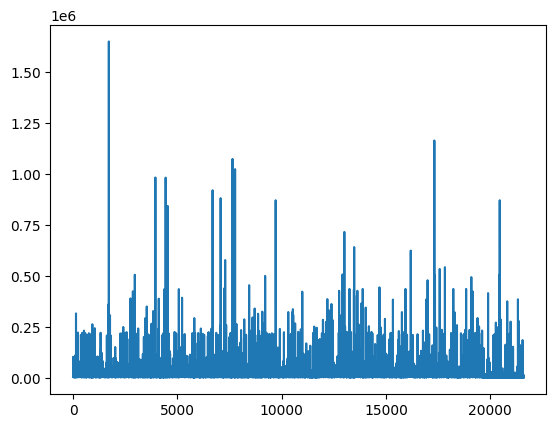

In [25]:
data_sqft_lot = data.values[:,4]
print(data_sqft_lot)
plt.plot(data_sqft_lot)

In [26]:
max(data_sqft_lot)

1651359

In [27]:
q1_sqft_lot = np.quantile(data_sqft_lot, .25, method='midpoint')
q2_sqft_lot = np.quantile(data_sqft_lot, .50, method='midpoint')
q3_sqft_lot = np.quantile(data_sqft_lot, .75, method='midpoint')

print(q1_sqft_lot, q2_sqft_lot, q3_sqft_lot)

5040.0 7618.0 10688.5


In [28]:
q1_sqft_lot = 5040
q2_sqft_lot = 7618
q3_sqft_lot = 10688
q4_sqft_lot = 100000
q5_sqft_lot = 250000
q6_sqft_lot = 500000

size = len(data_sqft_lot)
for i in range(size):
  if (data_sqft_lot[i]<= q1_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'very_low_sqft_lot')
  elif(q1_sqft_lot < data_sqft_lot[i] <= q2_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'low_sqft_lot')
  elif(q2_sqft_lot < data_sqft_lot[i] <= q3_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'middle_low_sqft_lot')
  elif(q3_sqft_lot < data_sqft_lot[i] <= q4_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'middle_sqft_lot')
  elif(q4_sqft_lot < data_sqft_lot[i] <= q5_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'middle_high_sqft_lot')
  elif(q5_sqft_lot < data_sqft_lot[i] <= q6_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'high_sqft_lot')
  elif(data_sqft_lot[i] > q6_sqft_lot):
      data['sqft_lot'] = data['sqft_lot'].replace(data_sqft_lot[i], 'top_sqft_lot')

In [29]:
print(data['sqft_lot'])
data.head()

0               low_sqft_lot
1               low_sqft_lot
2        middle_low_sqft_lot
3          very_low_sqft_lot
4        middle_low_sqft_lot
                ...         
21608      very_low_sqft_lot
21609           low_sqft_lot
21610      very_low_sqft_lot
21611      very_low_sqft_lot
21612      very_low_sqft_lot
Name: sqft_lot, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,1.0,0,3,7,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,2.0,0,3,7,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,1.0,0,3,6,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,1.0,0,5,7,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,1.0,0,3,8,1987,lower middle


[1.0 2.0 1.0 ... 2.0 2.0 2.0]


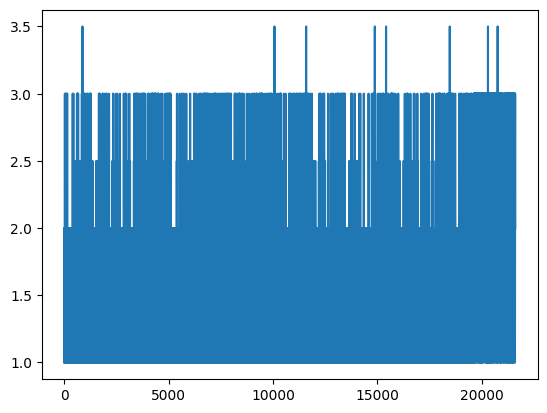

In [30]:
data_floors = data.values[:, 5]
print(data_floors)
plt.plot(data_floors)

In [31]:
q1_floors = 1
q2_floors = 2
q3_floors = 3

size = len(data_floors)
for i in range(size):
  if (data_floors[i]<= q1_floors):
      data['floors'] = data['floors'].replace(data_floors[i], 'low_floors')
  elif(q1_floors < data_floors[i] <= q2_floors):
      data['floors'] = data['floors'].replace(data_floors[i], 'middle_floors')
  elif(q2_floors < data_floors[i] <= q3_floors):
      data['floors'] = data['floors'].replace(data_floors[i], 'high_floors')
  elif(data_floors[i] > q3_floors):
      data['floors'] = data['floors'].replace(data_floors[i], 'top_floors')


In [32]:
print(data['floors'])
data.head()

0           low_floors
1        middle_floors
2           low_floors
3           low_floors
4           low_floors
             ...      
21608      high_floors
21609    middle_floors
21610    middle_floors
21611    middle_floors
21612    middle_floors
Name: floors, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,0,3,7,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,0,3,7,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,0,3,6,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,0,5,7,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,0,3,8,1987,lower middle


[0 0 0 ... 0 0 0]


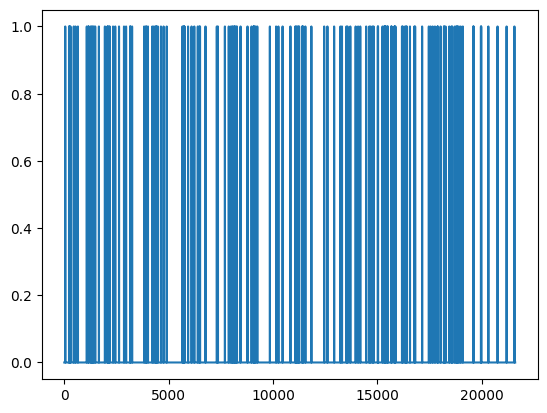

In [33]:
data_waterfront = data.values[:,6]
print(data_waterfront)
plt.plot(data_waterfront)

In [34]:
q1_waterfront = 1
size = len(data_waterfront)
for i in range(size):
  if (data_waterfront[i]< q1_waterfront):
      data['waterfront'] = data['waterfront'].replace(data_waterfront[i], 'no_waterfront')
  else:
      data['waterfront'] = data['waterfront'].replace(data_waterfront[i], 'has_waterfront')




In [35]:
print(data['waterfront'])
data.head()

0        no_waterfront
1        no_waterfront
2        no_waterfront
3        no_waterfront
4        no_waterfront
             ...      
21608    no_waterfront
21609    no_waterfront
21610    no_waterfront
21611    no_waterfront
21612    no_waterfront
Name: waterfront, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,no_waterfront,3,7,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,no_waterfront,3,7,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,3,6,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,no_waterfront,5,7,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,3,8,1987,lower middle


[3 3 3 ... 3 3 3]


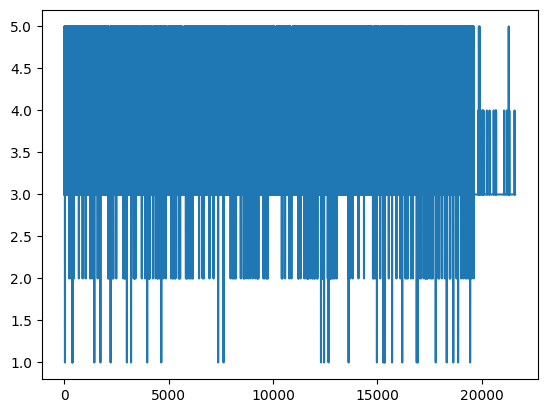

In [36]:
data_condition = data.values[:, 7]
print(data_condition)
plt.plot(data_condition)

In [37]:
q1_condition = 2
q2_condition = 3
q3_condition = 4

size = len(data_condition)
for i in range(size):
  if (data_condition[i]<= q1_condition):
      data['condition'] = data['condition'].replace(data_condition[i], 'bad_condition')
  elif(q1_condition < data_condition[i] <= q2_condition):
      data['condition'] = data['condition'].replace(data_condition[i], 'okay_condition')
  elif(q2_condition < data_condition[i] <= q3_condition):
      data['condition'] = data['condition'].replace(data_condition[i], 'good_condition')
  elif(data_condition[i] > q3_condition):
      data['condition'] = data['condition'].replace(data_condition[i], 'great_condition')

In [38]:
print(data['condition'])
data.head()

0         okay_condition
1         okay_condition
2         okay_condition
3        great_condition
4         okay_condition
              ...       
21608     okay_condition
21609     okay_condition
21610     okay_condition
21611     okay_condition
21612     okay_condition
Name: condition, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,no_waterfront,okay_condition,7,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,no_waterfront,okay_condition,7,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,6,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,no_waterfront,great_condition,7,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,8,1987,lower middle


[7 7 6 ... 7 8 7]


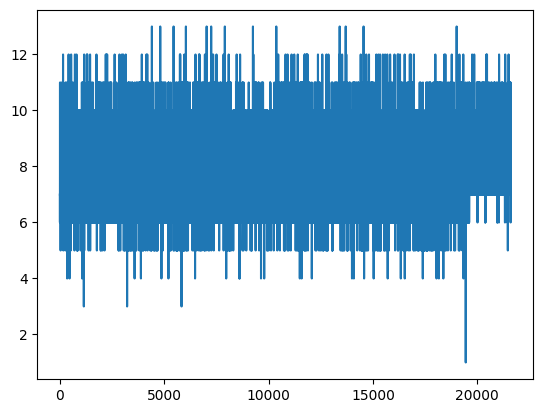

In [39]:
data_grade = data.values[:,8]
print(data_grade)
plt.plot(data_grade)

In [40]:
q1_grade = 4
q2_grade = 6
q3_grade = 8
q4_grade = 10
q5_grade = 12

size = len(data_grade)
for i in range(size):
  if (data_grade[i]<= q1_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'low_grade')
  elif(q1_grade < data_grade[i] <= q2_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'middle_low_grade')
  elif(q2_grade < data_grade[i] <= q3_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'middle_grade')
  elif(q3_grade < data_grade[i] <= q4_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'middle_high_grade')
  elif(q4_grade < data_grade[i] <= q5_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'high_grade')
  elif(data_grade[i] > q5_grade):
      data['grade'] = data['grade'].replace(data_grade[i], 'top_grade')

In [41]:
print(data['grade'])
data.head()

0            middle_grade
1            middle_grade
2        middle_low_grade
3            middle_grade
4            middle_grade
               ...       
21608        middle_grade
21609        middle_grade
21610        middle_grade
21611        middle_grade
21612        middle_grade
Name: grade, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,1955,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,no_waterfront,okay_condition,middle_grade,1951,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_low_grade,1933,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,no_waterfront,great_condition,middle_grade,1965,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,1987,lower middle


[1955 1951 1933 ... 2009 2004 2008]


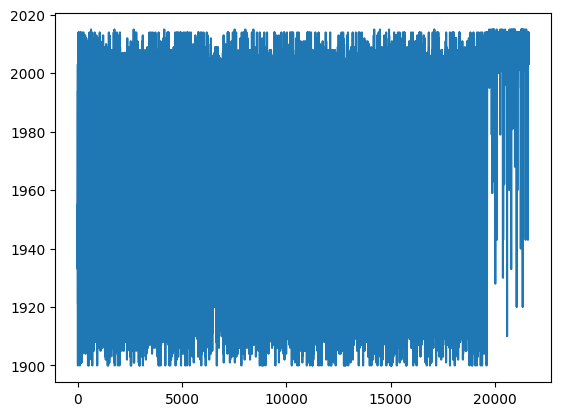

In [42]:
data_built = data.values[:,9]
print(data_built)
plt.plot(data_built)

In [43]:
q1_yr_built = 1920
q2_yr_built = 1940
q3_yr_built = 1960
q4_yr_built = 1980
q5_yr_built = 2000

size = len(data_built)
for i in range(size):
  if (data_built[i]<= q1_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'ancient')
  elif(q1_yr_built < data_built[i] <= q2_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'very_old')
  elif(q2_yr_built < data_built[i] <= q3_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'old')
  elif(q3_yr_built < data_built[i] <= q4_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'okay')
  elif(q4_yr_built < data_built[i] <= q5_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'recent')
  elif(data_built[i] > q5_yr_built):
      data['yr_built'] = data['yr_built'].replace(data_built[i], 'very_recent')

In [44]:
print(data['yr_built'])
data.head()

0                old
1                old
2           very_old
3               okay
4             recent
            ...     
21608    very_recent
21609    very_recent
21610    very_recent
21611    very_recent
21612    very_recent
Name: yr_built, Length: 21611, dtype: object


,Unnamed: 0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,old,lower
1,1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,no_waterfront,okay_condition,middle_grade,old,lower middle
2,2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_low_grade,very_old,lower
3,3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,no_waterfront,great_condition,middle_grade,okay,lower middle
4,4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,recent,lower middle


In [45]:
data = data.drop('Unnamed: 0', axis=1)

In [46]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,Social Class
0,middle_bed,low_bath,low_sqft_living,low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,old,lower
1,middle_bed,middle_bath,middle_high_sqft_living,low_sqft_lot,middle_floors,no_waterfront,okay_condition,middle_grade,old,lower middle
2,low_bed,low_bath,low_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_low_grade,very_old,lower
3,middle_bed,middle_bath,middle_sqft_living,very_low_sqft_lot,low_floors,no_waterfront,great_condition,middle_grade,okay,lower middle
4,middle_bed,low_bath,low_middle_sqft_living,middle_low_sqft_lot,low_floors,no_waterfront,okay_condition,middle_grade,recent,lower middle


lower class < 234000 -> 8% of the population

234000 <= working class < 399500 -> 32% of the population

399500 <= lower middle class < 612000 -> 32% of the population

612000 <= upper middle class < 799000 -> 14% of the population

765000 <= upper class <= 1960000 -> 13% of the population

1960000 < toppest class 1% of the population

In [47]:
i = 30
print(data.values[i, 9])

upper middle


In [48]:
size = len(data)
df_lower = []
df_working = []
df_low_middle = []
df_up_middle = []
df_upper = []
df_toppest = []
for i in range(size):
  if(data.values[i,9] == 'lower'):
    df_lower.append(data.values[i, :])
  elif(data.values[i,9] == 'working'):
    df_working.append(data.values[i, :])
  elif(data.values[i,9] == 'lower middle'):
    df_low_middle.append(data.values[i, :])
  elif(data.values[i,9] == 'upper middle'):
    df_up_middle.append(data.values[i, :])
  elif(data.values[i,9] == 'upper'):
    df_upper.append(data.values[i, :])
  elif(data.values[i,9] == 'toppest'):
    df_toppest.append(data.values[i, :])

In [49]:
len(df_lower)

1721

In [50]:
len(df_working)

6921

In [51]:
len(df_low_middle)

6916

In [52]:
len(df_up_middle)

3020

In [53]:
len(df_upper)

2815

In [54]:
len(df_toppest)

218

In [55]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=f95279282b88a621c744b26d670d03f1b4f1a8619e88abe57a7592612fbf6255
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [56]:
from apyori import apriori

In [77]:
#generating the association rules in the lower class with the higher support and confidence
lower_ar_hsc = apriori(df_lower, min_support = 0.8, min_confidence = 0.5, min_length = 2)
auxiliar_list = list(lower_ar_hsc)
list_lower_ar_hsc = [list(x) for x in auxiliar_list]
formatted_list_lower_ar_hsc = []
size = len(list_lower_ar_hsc)

for i in range(size):
  formatted_list_lower_ar_hsc.append([list(x) for x in list_lower_ar_hsc[i][2]])
formatted_list_lower_ar_hsc

[[[frozenset(), frozenset({'low_bath'}), 0.9174898314933179, 1.0]],
 [[frozenset(), frozenset({'low_floors'}), 0.8280069726902963, 1.0]],
 [[frozenset(), frozenset({'lower'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'low_bath', 'lower'}), 0.9174898314933179, 1.0],
  [frozenset({'low_bath'}), frozenset({'lower'}), 1.0, 1.0],
  [frozenset({'lower'}), frozenset({'low_bath'}), 0.9174898314933179, 1.0]],
 [[frozenset(),
   frozenset({'low_bath', 'no_waterfront'}),
   0.9174898314933179,
   1.0],
  [frozenset({'low_bath'}), frozenset({'no_waterfront'}), 1.0, 1.0],
  [frozenset({'no_waterfront'}),
   frozenset({'low_bath'}),
   0.9174898314933179,
   1.0]],
 [[frozenset(), frozenset({'low_floors', 'lower'}), 0.8280069726902963, 1.0],
  [frozenset({'low_floors'}), frozenset({'lower'}), 1.0, 1.0],
  [frozenset({'lower'}), frozenset({'low_floors'}), 0.8280069726902963, 1.0]],
 [[frozenset(),
   frozenset({'low_floors', 'no_waterfront'}),
 

In [78]:
#generating the association rules in the lower class with average paramaters
lower_ar_asc = apriori(df_lower, min_support = 0.3, min_confidence = 0.2, min_length = 2)
auxiliar_list = list(lower_ar_asc)
list_lower_ar_asc = [list(x) for x in auxiliar_list]
formatted_list_lower_ar_asc = []
size = len(list_lower_ar_asc)

for i in range(size):
  formatted_list_lower_ar_asc.append([list(x) for x in list_lower_ar_asc[i][2]])
formatted_list_lower_ar_asc

[[[frozenset(), frozenset({'good_condition'}), 0.32887855897733875, 1.0]],
 [[frozenset(), frozenset({'low_bath'}), 0.9174898314933179, 1.0]],
 [[frozenset(), frozenset({'low_bed'}), 0.3027309703660662, 1.0]],
 [[frozenset(), frozenset({'low_floors'}), 0.8280069726902963, 1.0]],
 [[frozenset(), frozenset({'low_sqft_living'}), 0.7408483439860546, 1.0]],
 [[frozenset(), frozenset({'low_sqft_lot'}), 0.3219058686809994, 1.0]],
 [[frozenset(), frozenset({'lower'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.6937826844857641, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.5252760023242301, 1.0]],
 [[frozenset(), frozenset({'middle_low_grade'}), 0.4619407321324811, 1.0]],
 [[frozenset(), frozenset({'middle_low_sqft_lot'}), 0.36955258570598487, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'okay'}), 0.33933759442184774, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.5549099360836722, 1.0]],
 [[frozenset(), frozenset({'

In [79]:
#generating the association rules in the lower class with the higher lift
lower_ar_hl = apriori(df_lower, min_lift = 2.1, min_length = 2)
auxiliar_list = list(lower_ar_hl)
list_lower_ar_hl = [list(x) for x in auxiliar_list]
formatted_list_lower_ar_hl = []
size = len(list_lower_ar_hl)

for i in range(size):
  formatted_list_lower_ar_hl.append([list(x) for x in list_lower_ar_hl[i][2]])
formatted_list_lower_ar_hl

[[[frozenset({'okay'}),
   frozenset({'good_condition', 'low_floors', 'middle_bed', 'middle_grade'}),
   0.3047945205479452,
   2.1066320074819824],
  [frozenset({'low_floors', 'okay'}),
   frozenset({'good_condition', 'middle_bed', 'middle_grade'}),
   0.3296296296296296,
   2.108894396254991],
  [frozenset({'middle_bed', 'okay'}),
   frozenset({'good_condition', 'low_floors', 'middle_grade'}),
   0.3442940038684719,
   2.1086476179987197],
  [frozenset({'good_condition', 'low_floors', 'middle_grade'}),
   frozenset({'middle_bed', 'okay'}),
   0.6334519572953737,
   2.1086476179987197],
  [frozenset({'good_condition', 'middle_bed', 'middle_grade'}),
   frozenset({'low_floors', 'okay'}),
   0.6617100371747211,
   2.1088943962549904],
  [frozenset({'good_condition', 'low_floors', 'middle_bed', 'middle_grade'}),
   frozenset({'okay'}),
   0.7148594377510039,
   2.1066320074819824]],
 [[frozenset({'okay'}),
   frozenset({'good_condition',
              'low_floors',
              'lower',

In [60]:
#generating the association rules in the working class with the higher support and confidence
working_ar_hsc = apriori(df_working, min_support = 0.8, min_confidence = 0.5, min_lenght = 3)
auxiliar_list = list(working_ar_hsc)
list_working_ar_hsc = [list(x) for x in auxiliar_list]
formatted_list_working_ar_hsc = []
size = len(list_working_ar_hsc)

for i in range(size):
  formatted_list_working_ar_hsc.append([list(x) for x in list_working_ar_hsc[i][2]])
formatted_list_working_ar_hsc

[[[frozenset(), frozenset({'middle_bed'}), 0.823146944083225, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.8182343591966479, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9988440976737466, 1.0]],
 [[frozenset(), frozenset({'working'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'middle_bed', 'no_waterfront'}),
   0.8227134807108799,
   1.0],
  [frozenset({'middle_bed'}),
   frozenset({'no_waterfront'}),
   0.9994734070563455,
   1.0006300376445778],
  [frozenset({'no_waterfront'}),
   frozenset({'middle_bed'}),
   0.8236655576450166,
   1.0006300376445778]],
 [[frozenset(), frozenset({'middle_bed', 'working'}), 0.823146944083225, 1.0],
  [frozenset({'middle_bed'}), frozenset({'working'}), 1.0, 1.0],
  [frozenset({'working'}), frozenset({'middle_bed'}), 0.823146944083225, 1.0]],
 [[frozenset(),
   frozenset({'middle_grade', 'no_waterfront'}),
   0.8180898714058662,
   1.0],
  [frozenset({'middle_grade'}),
   frozenset({'no_waterfront'}),
   0.99982341515098,
   1.000980

In [61]:
#generating the association rules in the working class with average parameters
working_ar_asc = apriori(df_working, min_support = 0.3, min_confidence = 0.2, min_lenght = 3)
auxiliar_list = list(working_ar_asc)
list_working_ar_asc = [list(x) for x in auxiliar_list]
formatted_list_working_ar_asc = []
size = len(list_working_ar_asc)

for i in range(size):
  formatted_list_working_ar_asc.append([list(x) for x in list_working_ar_asc[i][2]])
formatted_list_working_ar_asc

[[[frozenset(), frozenset({'low_bath'}), 0.6038144776766363, 1.0]],
 [[frozenset(), frozenset({'low_floors'}), 0.5951452102297355, 1.0]],
 [[frozenset(),
   frozenset({'low_middle_sqft_living'}),
   0.3321774310070799,
   1.0]],
 [[frozenset(), frozenset({'low_sqft_living'}), 0.3646871839329577, 1.0]],
 [[frozenset(), frozenset({'middle_bath'}), 0.3953185955786736, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.823146944083225, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.37855801184799887, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.8182343591966479, 1.0]],
 [[frozenset(), frozenset({'middle_low_sqft_lot'}), 0.30573616529403264, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9988440976737466, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6618985695708712, 1.0]],
 [[frozenset(), frozenset({'working'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'low_bath', 'low_floors'}),
   0.4892356595867649,
   1.0],
  [frozenset({'low_bath'}),
   frozenset(

In [62]:
#generating the association rules in the working class with the higher lift
working_ar_asc = apriori(df_working, min_lift = 4.5, min_lenght = 2)
auxiliar_list = list(working_ar_asc)
list_working_ar_asc = [list(x) for x in auxiliar_list]
formatted_list_working_ar_asc = []
size = len(list_working_ar_asc)

for i in range(size):
  formatted_list_working_ar_asc.append([list(x) for x in list_working_ar_asc[i][2]])
formatted_list_working_ar_asc

[[[frozenset({'middle_grade', 'very_recent'}),
   frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   0.5547619047619048,
   4.592711893369788],
  [frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   frozenset({'middle_grade', 'very_recent'}),
   0.8361244019138755,
   4.5927118933697875]],
 [[frozenset({'middle_grade', 'very_recent'}),
   frozenset({'middle_bath',
              'no_waterfront',
              'okay_condition',
              'very_low_sqft_lot'}),
   0.5547619047619048,
   4.592711893369788],
  [frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   frozenset({'middle_grade', 'no_waterfront', 'very_recent'}),
   0.8361244019138755,
   4.5927118933697875],
  [frozenset({'middle_grade', 'no_waterfront', 'very_recent'}),
   frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   0.5547619047619048,
   4.592711893369788],
  [frozenset({'middle_bath',
              'no_waterfront',
              'okay_condition

In [63]:
#generating the association rules in the low middle class with the higher support and confidence
low_middle_ar_hsc = apriori(df_low_middle, min_support = 0.8, min_confidence = 0.5, min_lenght = 2)
auxiliar_list = list(low_middle_ar_hsc)
list_low_middle_ar_hsc = [list(x) for x in auxiliar_list]
formatted_list_low_middle_ar_hsc = []
size = len(list_low_middle_ar_hsc)

for i in range(size):
  formatted_list_low_middle_ar_hsc.append([list(x) for x in list_low_middle_ar_hsc[i][2]])
formatted_list_low_middle_ar_hsc

[[[frozenset(), frozenset({'lower middle'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.8441295546558705, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.8409485251590515, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9978311162521689, 1.0]],
 [[frozenset(),
   frozenset({'lower middle', 'middle_bed'}),
   0.8441295546558705,
   1.0],
  [frozenset({'lower middle'}),
   frozenset({'middle_bed'}),
   0.8441295546558705,
   1.0],
  [frozenset({'middle_bed'}), frozenset({'lower middle'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'lower middle', 'middle_grade'}),
   0.8409485251590515,
   1.0],
  [frozenset({'lower middle'}),
   frozenset({'middle_grade'}),
   0.8409485251590515,
   1.0],
  [frozenset({'middle_grade'}), frozenset({'lower middle'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'lower middle', 'no_waterfront'}),
   0.9978311162521689,
   1.0],
  [frozenset({'lower middle'}),
   frozenset({'no_waterfront'}),
   0.9978311162521689,
   1.0],
  [frozens

In [64]:
#generating the association rules in the low middle class with average parameters
low_middle_ar_asc = apriori(df_low_middle, min_support = 0.3, min_confidence = 0.2, min_lenght = 2)
auxiliar_list = list(low_middle_ar_asc)
list_low_middle_ar_asc = [list(x) for x in auxiliar_list]
formatted_list_low_middle_ar_asc = []
size = len(list_low_middle_ar_asc)

for i in range(size):
  formatted_list_low_middle_ar_asc.append([list(x) for x in list_low_middle_ar_asc[i][2]])
formatted_list_low_middle_ar_asc

[[[frozenset(), frozenset({'low_bath'}), 0.4726720647773279, 1.0]],
 [[frozenset(), frozenset({'low_floors'}), 0.4950838635049161, 1.0]],
 [[frozenset(),
   frozenset({'low_middle_sqft_living'}),
   0.3043666859456333,
   1.0]],
 [[frozenset(), frozenset({'lower middle'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'middle_bath'}), 0.5235685367264314, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.8441295546558705, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.4589358010410642, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.8409485251590515, 1.0]],
 [[frozenset(), frozenset({'middle_sqft_living'}), 0.3084152689415847, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9978311162521689, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6678716020821284, 1.0]],
 [[frozenset(), frozenset({'very_low_sqft_lot'}), 0.3169462116830538, 1.0]],
 [[frozenset(),
   frozenset({'low_bath', 'low_floors'}),
   0.34282822440717176,
   1.0],
  [frozenset({'low_bath'}),
   froz

In [65]:
#generating the association rules in the low middle class with the higher lift
low_middle_ar_hl = apriori(df_low_middle, min_lift=3.4, min_lenght = 2)
auxiliar_list = list(low_middle_ar_hl)
list_low_middle_ar_hl = [list(x) for x in auxiliar_list]
formatted_list_low_middle_ar_hl = []
size = len(list_low_middle_ar_hl)

for i in range(size):
  formatted_list_low_middle_ar_hl.append([list(x) for x in list_low_middle_ar_hl[i][2]])
formatted_list_low_middle_ar_hl

[[[frozenset({'very_recent'}),
   frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   0.49295774647887325,
   3.4127084831310186],
  [frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   frozenset({'very_recent'}),
   0.7707707707707707,
   3.412708483131018]],
 [[frozenset({'very_recent'}),
   frozenset({'lower middle',
              'middle_bath',
              'okay_condition',
              'very_low_sqft_lot'}),
   0.49295774647887325,
   3.4127084831310186],
  [frozenset({'lower middle', 'very_recent'}),
   frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   0.49295774647887325,
   3.4127084831310186],
  [frozenset({'middle_bath', 'okay_condition', 'very_low_sqft_lot'}),
   frozenset({'lower middle', 'very_recent'}),
   0.7707707707707707,
   3.412708483131018],
  [frozenset({'lower middle',
              'middle_bath',
              'okay_condition',
              'very_low_sqft_lot'}),
   frozenset({'very_recent'}),
   0.7707

In [66]:
#generating the association rules in the upper middle class with the higher support and confidence
upper_middle_ar_hsc = apriori(df_up_middle, min_support = 0.8, min_confidence = 0.5, min_lenght = 2)
auxiliar_list = list(upper_middle_ar_hsc)
list_upper_middle_ar_hsc = [list(x) for x in auxiliar_list]
formatted_list_upper_middle_ar_hsc = []
size = len(list_upper_middle_ar_hsc)

for i in range(size):
  formatted_list_upper_middle_ar_hsc.append([list(x) for x in list_upper_middle_ar_hsc[i][2]])
formatted_list_upper_middle_ar_hsc

[[[frozenset(), frozenset({'middle_bed'}), 0.9129139072847682, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9933774834437086, 1.0]],
 [[frozenset(), frozenset({'upper middle'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'middle_bed', 'no_waterfront'}),
   0.9079470198675497,
   1.0],
  [frozenset({'middle_bed'}),
   frozenset({'no_waterfront'}),
   0.9945593035908596,
   1.0011896989481321],
  [frozenset({'no_waterfront'}),
   frozenset({'middle_bed'}),
   0.914,
   1.0011896989481321]],
 [[frozenset(),
   frozenset({'middle_bed', 'upper middle'}),
   0.9129139072847682,
   1.0],
  [frozenset({'middle_bed'}), frozenset({'upper middle'}), 1.0, 1.0],
  [frozenset({'upper middle'}),
   frozenset({'middle_bed'}),
   0.9129139072847682,
   1.0]],
 [[frozenset(),
   frozenset({'no_waterfront', 'upper middle'}),
   0.9933774834437086,
   1.0],
  [frozenset({'no_waterfront'}), frozenset({'upper middle'}), 1.0, 1.0],
  [frozenset({'upper middle'}),
   frozenset({'no_waterfront'}),
   

In [67]:
#generating the association rules in the upper middle class with average parameters
upper_middle_ar_asc = apriori(df_up_middle, min_support = 0.3, min_confidence = 0.2, min_lenght = 2)
auxiliar_list = list(upper_middle_ar_asc)
list_upper_middle_ar_asc = [list(x) for x in auxiliar_list]
formatted_list_upper_middle_ar_asc = []
size = len(list_upper_middle_ar_asc)

for i in range(size):
  formatted_list_upper_middle_ar_asc.append([list(x) for x in list_upper_middle_ar_asc[i][2]])
formatted_list_upper_middle_ar_asc

[[[frozenset(), frozenset({'low_bath'}), 0.31125827814569534, 1.0]],
 [[frozenset(), frozenset({'low_floors'}), 0.33211920529801325, 1.0]],
 [[frozenset(), frozenset({'middle_bath'}), 0.6841059602649007, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.9129139072847682, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.6301324503311259, 1.0]],
 [[frozenset(), frozenset({'middle_grade'}), 0.6198675496688741, 1.0]],
 [[frozenset(), frozenset({'middle_high_grade'}), 0.36456953642384105, 1.0]],
 [[frozenset(),
   frozenset({'middle_high_sqft_living'}),
   0.42748344370860925,
   1.0]],
 [[frozenset(), frozenset({'middle_sqft_living'}), 0.3486754966887417, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.9933774834437086, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6288079470198675, 1.0]],
 [[frozenset(), frozenset({'upper middle'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'low_bath', 'no_waterfront'}),
   0.30629139072847683,
   1.0],
  [frozenset({'low_bath'}),

In [68]:
#generating the association rules in the upper middle class with higher lift
upper_middle_ar_hl = apriori(df_up_middle, min_lift =2.7, min_lenght = 2)
auxiliar_list = list(upper_middle_ar_hl)
list_upper_middle_ar_hl = [list(x) for x in auxiliar_list]
formatted_list_upper_middle_ar_hl = []
size = len(list_upper_middle_ar_hl)

for i in range(size):
  formatted_list_upper_middle_ar_hl.append([list(x) for x in list_upper_middle_ar_hl[i][2]])
formatted_list_upper_middle_ar_hl

[[[frozenset({'old'}),
   frozenset({'low_floors', 'middle_bed', 'middle_grade'}),
   0.6688172043010752,
   2.7555633792486316],
  [frozenset({'low_floors', 'middle_grade'}),
   frozenset({'middle_bed', 'old'}),
   0.36247086247086246,
   2.7095594174802096],
  [frozenset({'middle_bed', 'old'}),
   frozenset({'low_floors', 'middle_grade'}),
   0.7698019801980197,
   2.7095594174802096],
  [frozenset({'low_floors', 'middle_bed', 'middle_grade'}),
   frozenset({'old'}),
   0.42428376534788537,
   2.7555633792486316]],
 [[frozenset({'old'}),
   frozenset({'low_floors', 'middle_bed', 'middle_grade', 'no_waterfront'}),
   0.6602150537634408,
   2.7425714750558337],
  [frozenset({'low_floors', 'middle_grade'}),
   frozenset({'middle_bed', 'no_waterfront', 'old'}),
   0.35780885780885785,
   2.7014568764568767],
  [frozenset({'no_waterfront', 'old'}),
   frozenset({'low_floors', 'middle_bed', 'middle_grade'}),
   0.6688453159041395,
   2.7556792005873145],
  [frozenset({'low_floors', 'middle

In [69]:
#generating the association rules in the upper class with the higher support and confidence
upper_class_hsc = apriori(df_upper, min_support = 0.8, min_confidence = 0.5, min_lenght = 2)
auxiliar_list = list(upper_class_hsc)
list_upper_class_hsc = [list(x) for x in auxiliar_list]
formatted_list_upper_class_hsc = []
size = len(list_upper_class_hsc)

for i in range(size):
  formatted_list_upper_class_hsc.append([list(x) for x in list_upper_class_hsc[i][2]])
formatted_list_upper_class_hsc

[[[frozenset(), frozenset({'middle_bath'}), 0.805683836589698, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.9321492007104796, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.974777975133215, 1.0]],
 [[frozenset(), frozenset({'upper'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'middle_bath', 'upper'}), 0.805683836589698, 1.0],
  [frozenset({'middle_bath'}), frozenset({'upper'}), 1.0, 1.0],
  [frozenset({'upper'}), frozenset({'middle_bath'}), 0.805683836589698, 1.0]],
 [[frozenset(),
   frozenset({'middle_bed', 'no_waterfront'}),
   0.9129662522202486,
   1.0],
  [frozenset({'middle_bed'}),
   frozenset({'no_waterfront'}),
   0.979420731707317,
   1.0047628862084903],
  [frozenset({'no_waterfront'}),
   frozenset({'middle_bed'}),
   0.9365889212827988,
   1.0047628862084903]],
 [[frozenset(), frozenset({'middle_bed', 'upper'}), 0.9321492007104796, 1.0],
  [frozenset({'middle_bed'}), frozenset({'upper'}), 1.0, 1.0],
  [frozenset({'upper'}), frozenset({'middle_bed'}), 0.9321492

In [70]:
#generating the association rules in the upper class with average parameters
upper_class_asc = apriori(df_upper, min_support = 0.3, min_confidence = 0.2, min_lenght = 2)
auxiliar_list = list(upper_class_asc)
list_upper_class_asc = [list(x) for x in auxiliar_list]
formatted_list_upper_class_asc = []
size = len(list_upper_class_asc)

for i in range(size):
  formatted_list_upper_class_asc.append([list(x) for x in list_upper_class_asc[i][2]])
formatted_list_upper_class_asc

[[[frozenset(), frozenset({'middle_bath'}), 0.805683836589698, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.9321492007104796, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.7119005328596802, 1.0]],
 [[frozenset(), frozenset({'middle_high_grade'}), 0.5900532859680284, 1.0]],
 [[frozenset(),
   frozenset({'middle_high_sqft_living'}),
   0.7264653641207816,
   1.0]],
 [[frozenset(), frozenset({'middle_sqft_lot'}), 0.38010657193605685, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.974777975133215, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6539964476021315, 1.0]],
 [[frozenset(), frozenset({'upper'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'middle_bath', 'middle_bed'}),
   0.7648312611012433,
   1.0],
  [frozenset({'middle_bath'}),
   frozenset({'middle_bed'}),
   0.949294532627866,
   1.0183933343549705],
  [frozenset({'middle_bed'}),
   frozenset({'middle_bath'}),
   0.8205030487804877,
   1.0183933343549705]],
 [[frozenset(),
   frozenset({'middle

In [71]:
#generating the association rules in the upper class with the higher lift
upper_class_hl = apriori(df_upper, min_lift = 2.5, min_lenght = 2)
auxiliar_list = list(upper_class_hl)
list_upper_class_hl = [list(x) for x in auxiliar_list]
formatted_list_upper_class_hl = []
size = len(list_upper_class_hl)

for i in range(size):
  formatted_list_upper_class_hl.append([list(x) for x in list_upper_class_hl[i][2]])
formatted_list_upper_class_hl

[[[frozenset({'low_bath'}),
   frozenset({'middle_grade'}),
   0.7225,
   2.590875796178344],
  [frozenset({'middle_grade'}),
   frozenset({'low_bath'}),
   0.36815286624203825,
   2.590875796178344]],
 [[frozenset({'low_bath'}),
   frozenset({'middle_grade', 'upper'}),
   0.7225,
   2.590875796178344],
  [frozenset({'middle_grade'}),
   frozenset({'low_bath', 'upper'}),
   0.36815286624203825,
   2.590875796178344],
  [frozenset({'low_bath', 'upper'}),
   frozenset({'middle_grade'}),
   0.7225,
   2.590875796178344],
  [frozenset({'middle_grade', 'upper'}),
   frozenset({'low_bath'}),
   0.36815286624203825,
   2.590875796178344]],
 [[frozenset({'middle_high_sqft_living', 'recent'}),
   frozenset({'middle_bath',
              'middle_bed',
              'middle_floors',
              'middle_sqft_lot',
              'no_waterfront'}),
   0.5084459459459459,
   2.515422386358239],
  [frozenset({'middle_bed', 'middle_high_sqft_living', 'recent'}),
   frozenset({'middle_bath',
          

In [72]:
#generating the association rules in the toppest class with the higher support and confidence
topper_class_hsc = apriori(df_toppest, min_support = 0.6, min_confidence = 0.5, min_lenght = 2)
auxiliar_list = list(topper_class_hsc)
list_topper_class_hsc = [list(x) for x in auxiliar_list]
formatted_list_topper_class_hsc = []
size = len(list_topper_class_hsc)

for i in range(size):
  formatted_list_topper_class_hsc.append([list(x) for x in list_topper_class_hsc[i][2]])
formatted_list_topper_class_hsc

[[[frozenset(), frozenset({'middle_bath'}), 0.6513761467889908, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.8944954128440367, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.7110091743119266, 1.0]],
 [[frozenset(),
   frozenset({'middle_high_sqft_living'}),
   0.6009174311926605,
   1.0]],
 [[frozenset(), frozenset({'middle_sqft_lot'}), 0.6880733944954128, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.7752293577981652, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6192660550458715, 1.0]],
 [[frozenset(), frozenset({'toppest'}), 1.0, 1.0]],
 [[frozenset(),
   frozenset({'middle_bath', 'middle_bed'}),
   0.6238532110091743,
   1.0],
  [frozenset({'middle_bath'}),
   frozenset({'middle_bed'}),
   0.9577464788732395,
   1.070711448176237],
  [frozenset({'middle_bed'}),
   frozenset({'middle_bath'}),
   0.6974358974358975,
   1.070711448176237]],
 [[frozenset(),
   frozenset({'middle_bath', 'toppest'}),
   0.6513761467889908,
   1.0],
  [frozenset({'middle_

In [73]:
#generating the association rules in the toppest class with the average support and confidence
topper_class_asc = apriori(df_toppest, min_support = 0.3, min_confidence = 0.2, min_lenght = 2)
auxiliar_list = list(topper_class_asc)
list_topper_class_asc = [list(x) for x in auxiliar_list]
formatted_list_topper_class_asc = []
size = len(list_topper_class_asc)

for i in range(size):
  formatted_list_topper_class_asc.append([list(x) for x in list_topper_class_asc[i][2]])
formatted_list_topper_class_asc

[[[frozenset(), frozenset({'high_bath'}), 0.30275229357798167, 1.0]],
 [[frozenset(), frozenset({'high_grade'}), 0.5137614678899083, 1.0]],
 [[frozenset(), frozenset({'high_sqft_living'}), 0.3577981651376147, 1.0]],
 [[frozenset(), frozenset({'middle_bath'}), 0.6513761467889908, 1.0]],
 [[frozenset(), frozenset({'middle_bed'}), 0.8944954128440367, 1.0]],
 [[frozenset(), frozenset({'middle_floors'}), 0.7110091743119266, 1.0]],
 [[frozenset(), frozenset({'middle_high_grade'}), 0.39908256880733944, 1.0]],
 [[frozenset(),
   frozenset({'middle_high_sqft_living'}),
   0.6009174311926605,
   1.0]],
 [[frozenset(), frozenset({'middle_sqft_lot'}), 0.6880733944954128, 1.0]],
 [[frozenset(), frozenset({'no_waterfront'}), 0.7752293577981652, 1.0]],
 [[frozenset(), frozenset({'okay_condition'}), 0.6192660550458715, 1.0]],
 [[frozenset(), frozenset({'toppest'}), 1.0, 1.0]],
 [[frozenset(), frozenset({'very_recent'}), 0.3302752293577982, 1.0]],
 [[frozenset(), frozenset({'high_bath', 'toppest'}), 0.

In [74]:
#generating the association rules in the toppest class with the higher lift
topper_class_hl = apriori(df_toppest, min_lift = 3.5, min_lenght = 2)
auxiliar_list = list(topper_class_hl)
list_topper_class_hl = [list(x) for x in auxiliar_list]
formatted_list_topper_class_hl = []
size = len(list_topper_class_hl)

for i in range(size):
  formatted_list_topper_class_hl.append([list(x) for x in list_topper_class_hl[i][2]])
formatted_list_topper_class_hl

[[[frozenset({'high_grade', 'high_sqft_living', 'okay_condition'}),
   frozenset({'middle_bed',
              'middle_sqft_lot',
              'no_waterfront',
              'very_recent'}),
   0.55,
   3.526470588235294],
  [frozenset({'middle_sqft_lot', 'no_waterfront', 'very_recent'}),
   frozenset({'high_grade',
              'high_sqft_living',
              'middle_bed',
              'okay_condition'}),
   0.6111111111111112,
   3.5058479532163744],
  [frozenset({'high_grade',
              'high_sqft_living',
              'middle_bed',
              'okay_condition'}),
   frozenset({'middle_sqft_lot', 'no_waterfront', 'very_recent'}),
   0.5789473684210527,
   3.5058479532163744],
  [frozenset({'middle_bed',
              'middle_sqft_lot',
              'no_waterfront',
              'very_recent'}),
   frozenset({'high_grade', 'high_sqft_living', 'okay_condition'}),
   0.6470588235294118,
   3.526470588235294]],
 [[frozenset({'high_grade', 'high_sqft_living', 'okay_condition